# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [10]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [12]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [14]:
from sklearn.model_selection import train_test_split

# Define X and y
X = data.drop(columns=['MEDV'])  
y = data['MEDV']  # Target variable

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes 
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
from sklearn.linear_model import LinearRegression

# Train a LinearRegression model
model = LinearRegression()

# Train (fit) the model on the training data
model.fit(X_train, y_train)

# Generate predictions
y_train_pred = model.predict(X_train) 
y_test_pred = model.predict(X_test)    

## 3. Calculate and print R-squared for both the training and the testing set.

In [25]:
from sklearn.metrics import r2_score

# Calculate R-squared for training set & testing set
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print("R-squared for Training Set:", r2_train)
print("R-squared for Testing Set:", r2_test)


R-squared for Training Set: 0.7508856358979673
R-squared for Testing Set: 0.6687594935356307


## 4. Calculate and print mean squared error for both the training and the testing set.

In [29]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for training set & testing set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Mean Squared Error for Training Set:", mse_train)
print("Mean Squared Error for Training Set:", mse_test)


Mean Squared Error for Training Set: 21.641412753226312
Mean Squared Error for Training Set: 24.291119474973613


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [31]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for training set & testing set
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Mean Absolute Error for Training Set:", mae_train)
print("Mean Absolute Error for Training Set:", mae_test)


Mean Absolute Error for Training Set: 3.314771626783227
Mean Absolute Error for Training Set: 3.189091965887852


## Classification Model Evaluation

In [34]:
from sklearn.datasets import load_iris
data = load_iris()

In [36]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [38]:
column_names = data.feature_names

In [40]:
df = pd.DataFrame(data['data'],columns=column_names)

In [42]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
target = pd.DataFrame(data.target)

In [46]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [47]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [57]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Convert to DataFrame
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target  

# Define features X and target y
X = data.drop(columns=['class']) 
y = data['class']  

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

# Train the model on the training set
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Print accuracy scores
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))


Training Accuracy: 0.975
Testing Accuracy: 0.9666666666666667


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [68]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.975
Testing Accuracy: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [75]:
from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for training and testing sets
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print the results
print("Balanced Training Accuracy:", train_balanced_accuracy)
print("Balanced Testing Accuracy:", test_balanced_accuracy)


Balanced Training Accuracy: 0.975
Balanced Testing Accuracy: 0.9666666666666667


## 10. Calculate and print the precision score for both the training and the testing set.

In [77]:
from sklearn.metrics import precision_score

# Calculate precision for training and testing sets
train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Precision Score (Training):", train_precision)
print("Precision Score (Testing):", test_precision)

Precision Score (Training): 0.9751928288513655
Precision Score (Testing): 0.9696969696969696


## 11. Calculate and print the recall score for both the training and the testing set.

In [80]:
from sklearn.metrics import recall_score

# Calculate recall for training and testing sets
train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print the results
print("Recall Score (Training):", train_recall)
print("Recall Score (Testing):", test_recall)

Recall Score (Training): 0.975
Recall Score (Testing): 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [82]:
from sklearn.metrics import f1_score

# Calculate F1-score for training and testing sets
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the results
print("F1 Score (Training):", train_f1)
print("F1 Score (Testing):", test_f1)


F1 Score (Training): 0.9749960931395532
F1 Score (Testing): 0.9665831244778613


## 13. Generate confusion matrices for both the training and the testing set.

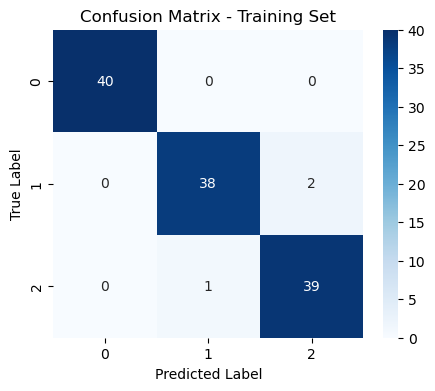

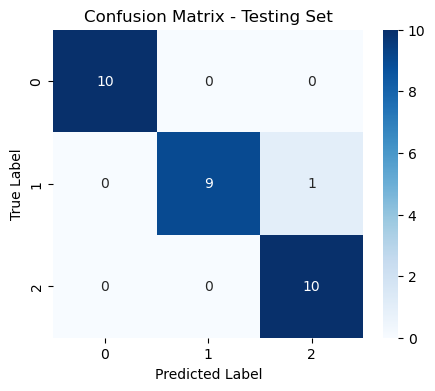

In [85]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_train), yticklabels=set(y_train))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot the matrices
plot_confusion_matrix(train_cm, "Confusion Matrix - Training Set")
plot_confusion_matrix(test_cm, "Confusion Matrix - Testing Set")


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models to test
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

In [89]:
# Dictionary to store results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train F1-score": train_f1,
        "Test F1-score": test_f1
    }

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T
print(results_df)


                        Train Accuracy  Test Accuracy  Train F1-score  \
Logistic Regression           0.975000       0.966667        0.974996   
Decision Tree                 1.000000       0.933333        1.000000   
Random Forest                 1.000000       0.933333        1.000000   
Support Vector Machine        0.983333       0.966667        0.983333   

                        Test F1-score  
Logistic Regression          0.966583  
Decision Tree                0.933333  
Random Forest                0.933333  
Support Vector Machine       0.966583  


<Figure size 1000x600 with 0 Axes>

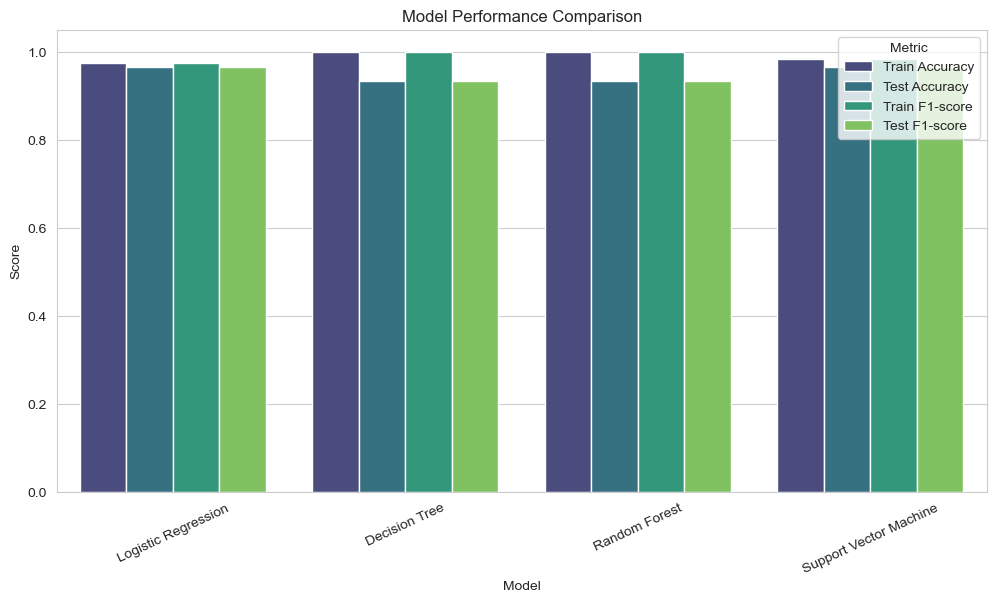

In [95]:
# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Melt the results DataFrame for visualization
results_melted = results_df.reset_index().melt(id_vars=["index"], var_name="Metric", value_name="Score")

# Rename the column for clarity
results_melted.rename(columns={"index": "Model"}, inplace=True)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette="viridis")

# Improve plot readability
plt.xticks(rotation=25)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend(title="Metric")
plt.show()


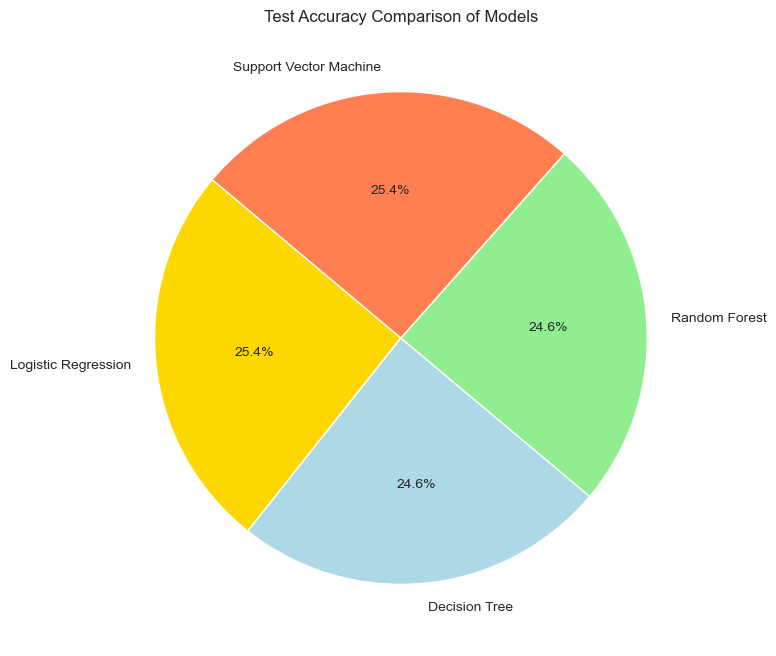

In [96]:
# Extract test accuracy values
test_accuracies = results_df["Test Accuracy"]

# Define labels and values
models = test_accuracies.index
accuracy_values = test_accuracies.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_values, labels=models, autopct="%1.1f%%", startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'coral'])

# Title
plt.title("Test Accuracy Comparison of Models")
plt.show()
